In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress


In [5]:
# Specify the path to your CSV file
file_path = r'C:\Users\manda\Documents\Master thesis Data\Eversleigh text fileindcal.csv'


# Try different encodings until you find the right one
encodings = ['utf-8', 'latin1', 'utf-16']

for encoding in encodings:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding=encoding)
        # Display the DataFrame
        print(df)
        break
    except UnicodeDecodeError:
        print(f"Failed to decode using encoding: {encoding}")

# Display the DataFrame
print(df)

       year  month  day  prcp  tmax  tmin
0      1877      1    1 -99.9 -99.9 -99.9
1      1877      1    2 -99.9 -99.9 -99.9
2      1877      1    3 -99.9 -99.9 -99.9
3      1877      1    4 -99.9 -99.9 -99.9
4      1877      1    5 -99.9 -99.9 -99.9
...     ...    ...  ...   ...   ...   ...
16795  1922     12   27 -99.9 -99.9 -99.9
16796  1922     12   28 -99.9 -99.9 -99.9
16797  1922     12   29 -99.9 -99.9 -99.9
16798  1922     12   30 -99.9 -99.9 -99.9
16799  1922     12   31 -99.9 -99.9 -99.9

[16800 rows x 6 columns]
       year  month  day  prcp  tmax  tmin
0      1877      1    1 -99.9 -99.9 -99.9
1      1877      1    2 -99.9 -99.9 -99.9
2      1877      1    3 -99.9 -99.9 -99.9
3      1877      1    4 -99.9 -99.9 -99.9
4      1877      1    5 -99.9 -99.9 -99.9
...     ...    ...  ...   ...   ...   ...
16795  1922     12   27 -99.9 -99.9 -99.9
16796  1922     12   28 -99.9 -99.9 -99.9
16797  1922     12   29 -99.9 -99.9 -99.9
16798  1922     12   30 -99.9 -99.9 -99.9
16799  1

In [6]:
# Count missing values in each column marked as -99.9
missing_values_count = (df == -99.9).sum()

# Display the result
print("Number of missing values (-99.9) in each column:")
print(missing_values_count)



Number of missing values (-99.9) in each column:
year       0
month      0
day        0
prcp     437
tmax     613
tmin     681
dtype: int64


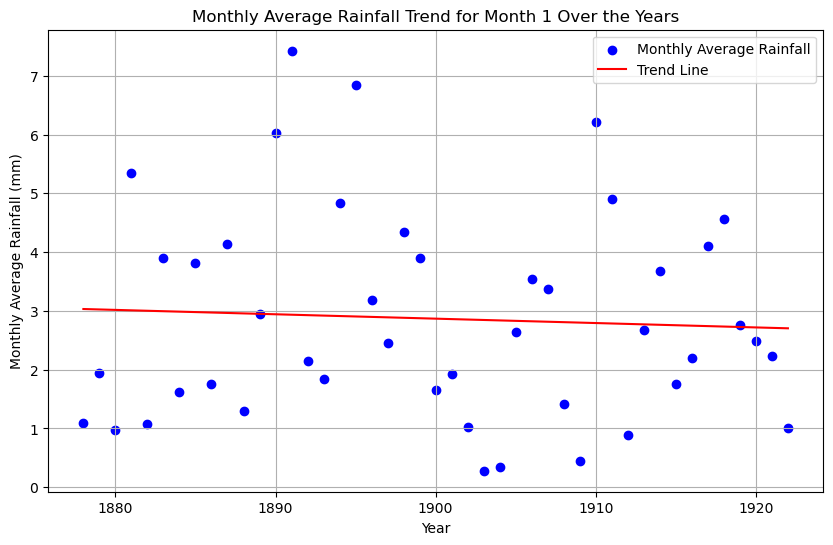

The trend in monthly average rainfall for Month 1 is decreasing, with a magnitude of 0.01 mm per year.


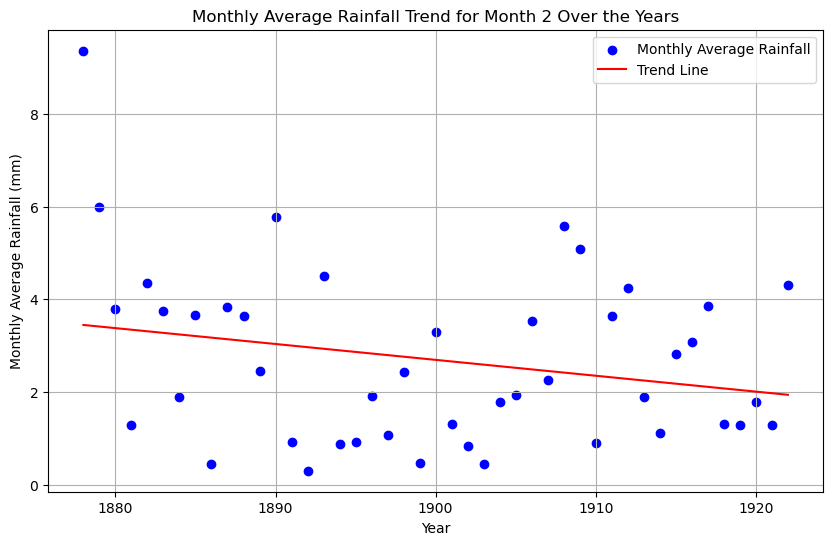

The trend in monthly average rainfall for Month 2 is decreasing, with a magnitude of 0.03 mm per year.


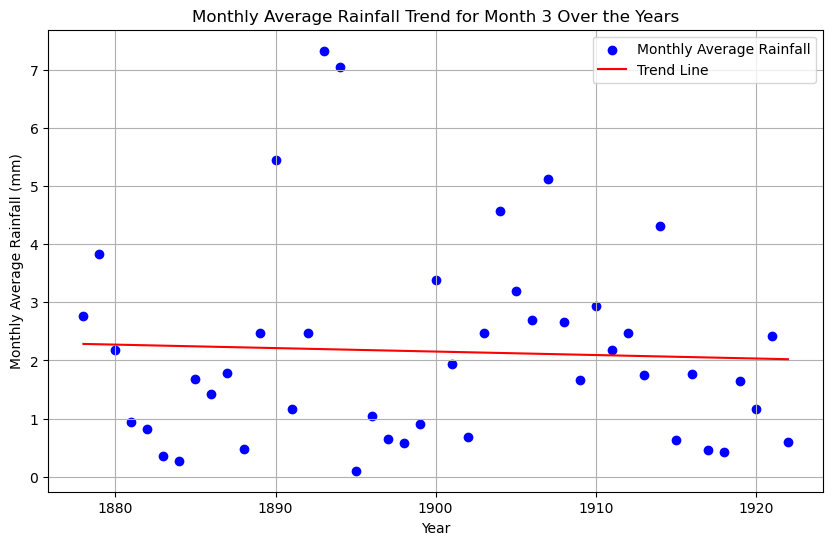

The trend in monthly average rainfall for Month 3 is decreasing, with a magnitude of 0.01 mm per year.


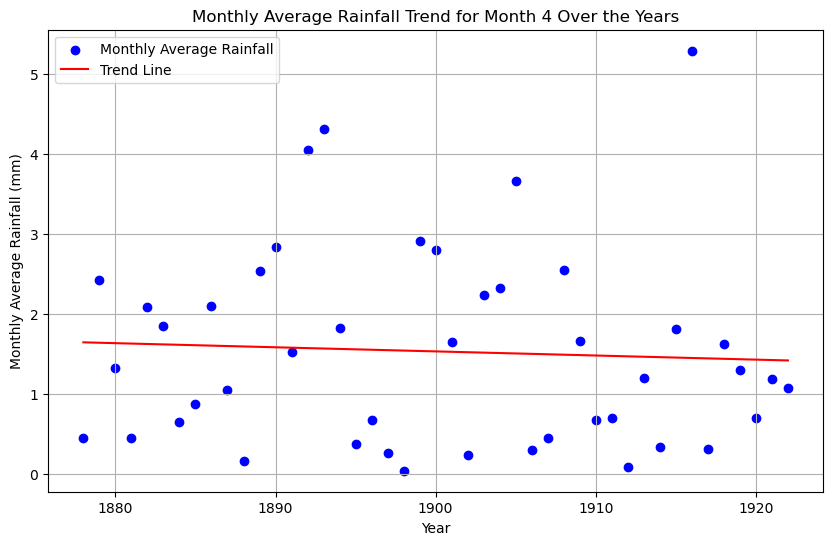

The trend in monthly average rainfall for Month 4 is decreasing, with a magnitude of 0.01 mm per year.


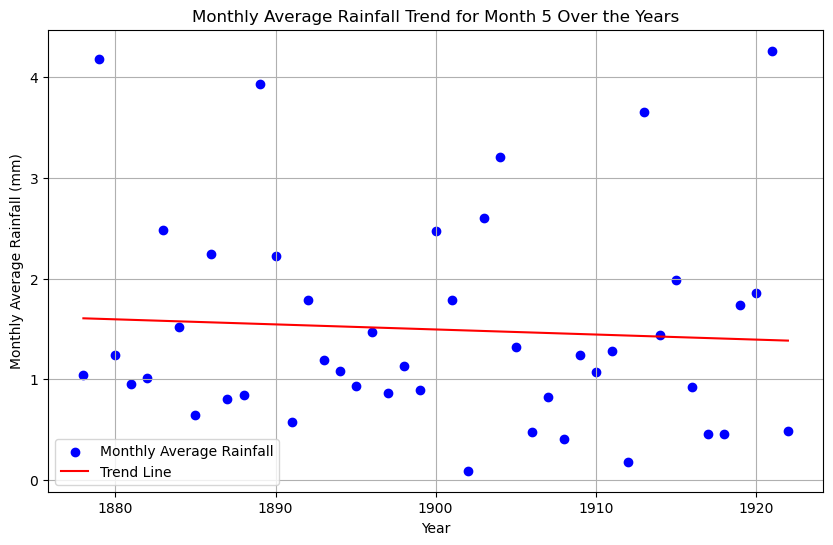

The trend in monthly average rainfall for Month 5 is decreasing, with a magnitude of 0.01 mm per year.


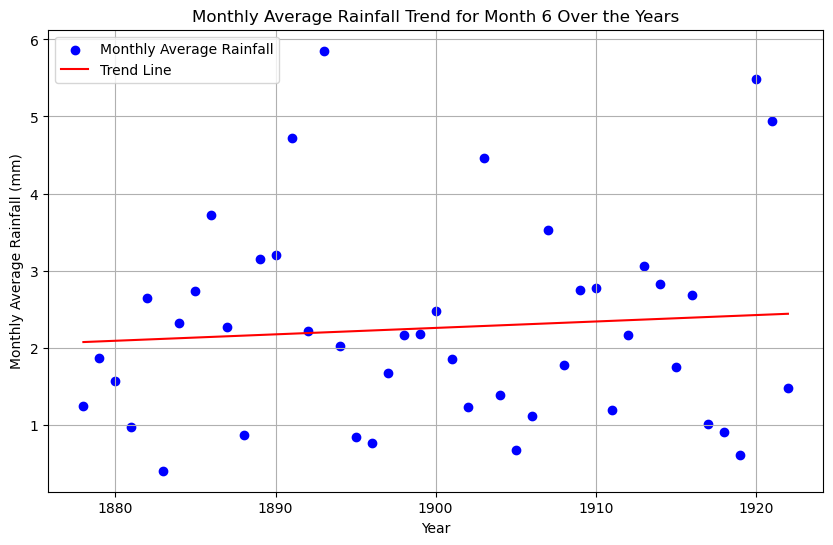

The trend in monthly average rainfall for Month 6 is increasing, with a magnitude of 0.01 mm per year.


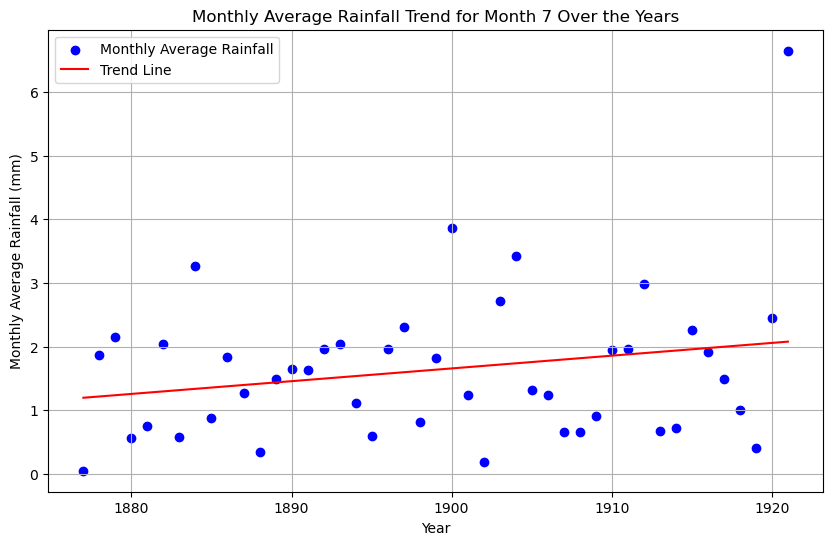

The trend in monthly average rainfall for Month 7 is increasing, with a magnitude of 0.02 mm per year.


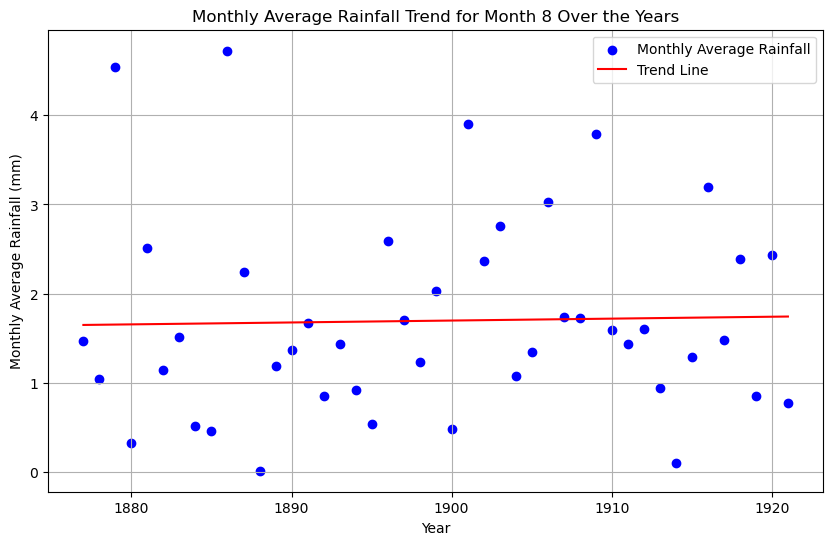

The trend in monthly average rainfall for Month 8 is increasing, with a magnitude of 0.00 mm per year.


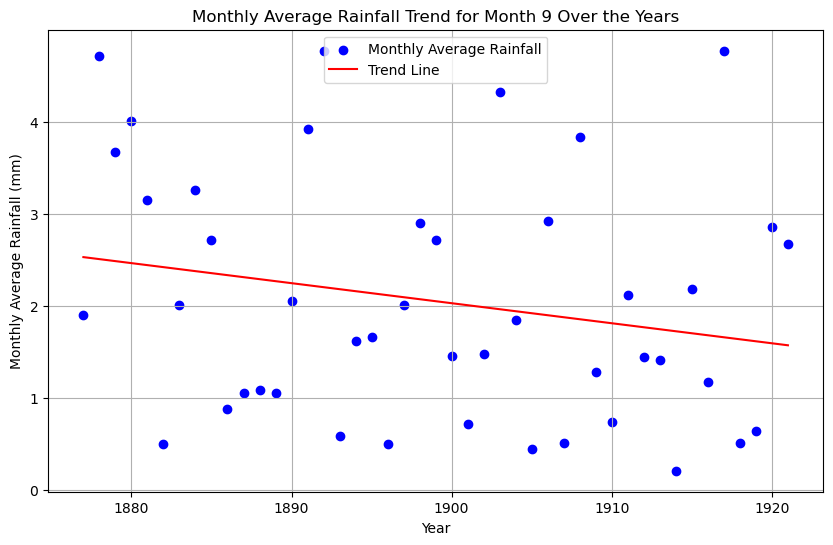

The trend in monthly average rainfall for Month 9 is decreasing, with a magnitude of 0.02 mm per year.


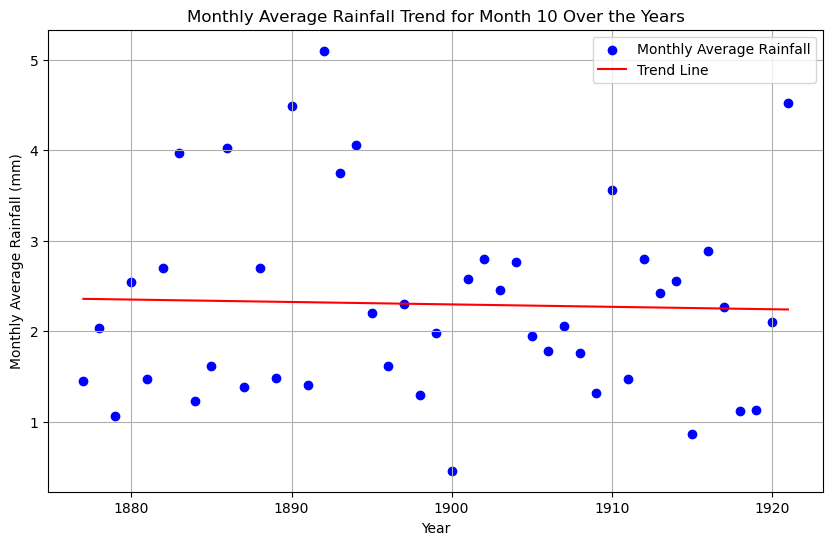

The trend in monthly average rainfall for Month 10 is decreasing, with a magnitude of 0.00 mm per year.


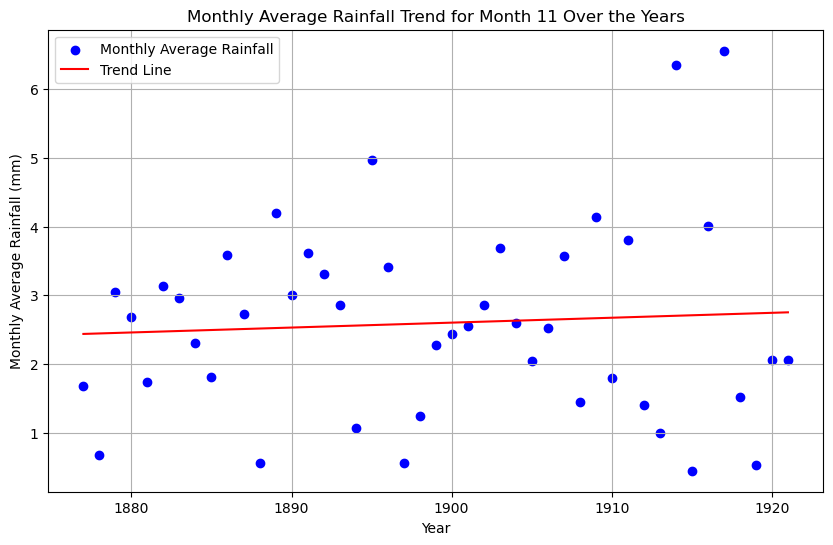

The trend in monthly average rainfall for Month 11 is increasing, with a magnitude of 0.01 mm per year.


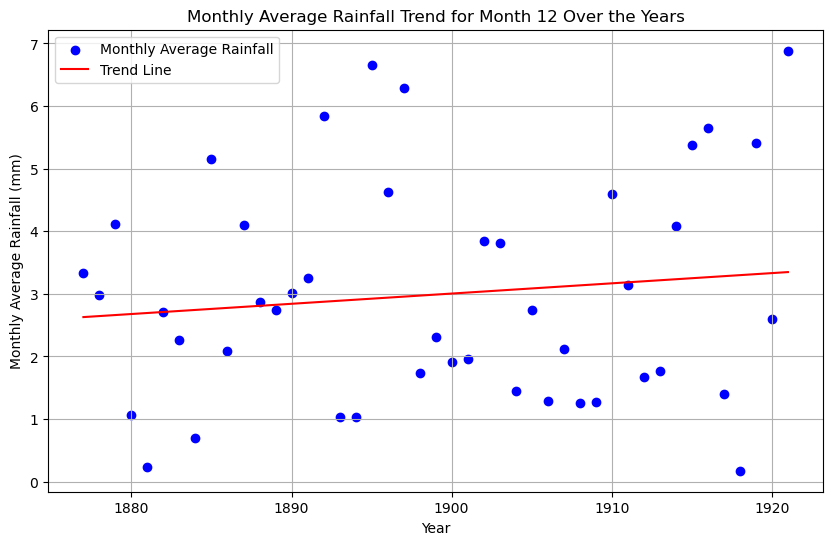

The trend in monthly average rainfall for Month 12 is increasing, with a magnitude of 0.02 mm per year.


In [4]:
# Create a list to store trend information for each month
monthly_trends = []

# Iterate over each month
for month in range(1, 13):
    # Filter the DataFrame for the current month
    monthly_data = monthly_avg_rainfall[monthly_avg_rainfall['Month'] == month]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(monthly_data['Year'], monthly_data['Rainfall..mm.'])
    
    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.scatter(monthly_data['Year'], monthly_data['Rainfall..mm.'], color='b', label='Monthly Average Rainfall')
    plt.plot(monthly_data['Year'], intercept + slope * monthly_data['Year'], color='r', label='Trend Line')
    plt.title(f'Monthly Average Rainfall Trend for Month {month} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Monthly Average Rainfall (mm)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Determine if trend is increasing or decreasing
    if slope > 0:
        trend = "increasing"
    elif slope < 0:
        trend = "decreasing"
    else :
        slope ==0
        trend = "stable"
    
    # Calculate the magnitude of the trend
    trend_magnitude = abs(slope)
    
    # Print trend information
    print(f"The trend in monthly average rainfall for Month {month} is {trend}, with a magnitude of {trend_magnitude:.2f} mm per year.")
    
    # Store trend information
    monthly_trends.append((month, trend, trend_magnitude))

In [5]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with '-99.9' rainfall values
df_filtered = df[df['Rainfall..mm.'] != -99.9]

# Calculate the annual average rainfall for each year
annual_avg_rainfall = df_filtered.groupby(df_filtered['Date'].dt.year)['Rainfall..mm.'].mean().reset_index()

# Rename columns for better clarity
annual_avg_rainfall.columns = ['Year', 'Annual Average Rainfall (mm)']

# Print the annual average rainfall for each year in the form of a table
print("Annual Average Rainfall:")
print(annual_avg_rainfall.to_string(index=False))

Annual Average Rainfall:
  Year  Annual Average Rainfall (mm)
1877.0                      1.831098
1878.0                      2.387637
1879.0                      3.218082
1880.0                      1.838798
1881.0                      1.655068
1882.0                      1.998082
1883.0                      2.159726
1884.0                      1.621370
1885.0                      2.156198
1886.0                      2.419780
1887.0                      2.214050
1888.0                      1.237088
1889.0                      2.467123
1890.0                      3.413187
1891.0                      2.653297
1892.0                      2.901096
1893.0                      3.043014
1894.0                      2.312637
1895.0                      2.244353
1896.0                      1.984573
1897.0                      1.857808
1898.0                      1.651099
1899.0                      2.040548
1900.0                      2.219505
1901.0                      1.956474
1902.0       

In [6]:
# Calculate the average of the "Annual Average Rainfall (mm)" column
average_annual_rainfall = annual_avg_rainfall['Annual Average Rainfall (mm)'].mean()

print("Average of Annual Average Rainfall:", average_annual_rainfall, "mm")

Average of Annual Average Rainfall: 2.1749501198002252 mm


In [7]:
# Define thresholds for classifying years
dry_threshold = -0.05
wet_threshold = 0.05

# Classify the years based on the deviation from the average annual rainfall
def classify_year(row):
    deviation = row['Annual Average Rainfall (mm)'] - average_annual_rainfall
    if deviation < dry_threshold:
        return 'Dry'
    elif deviation > wet_threshold:
        return 'Wet'
    else:
        return 'Normal'

# Apply the classification function to each row in the DataFrame
annual_avg_rainfall['Classification'] = annual_avg_rainfall.apply(classify_year, axis=1)




# Display the DataFrame with classifications
print("Classification of Years:")
print(annual_avg_rainfall[['Year', 'Classification']])

Classification of Years:
      Year Classification
0   1877.0            Dry
1   1878.0            Wet
2   1879.0            Wet
3   1880.0            Dry
4   1881.0            Dry
5   1882.0            Dry
6   1883.0         Normal
7   1884.0            Dry
8   1885.0         Normal
9   1886.0            Wet
10  1887.0         Normal
11  1888.0            Dry
12  1889.0            Wet
13  1890.0            Wet
14  1891.0            Wet
15  1892.0            Wet
16  1893.0            Wet
17  1894.0            Wet
18  1895.0            Wet
19  1896.0            Dry
20  1897.0            Dry
21  1898.0            Dry
22  1899.0            Dry
23  1900.0         Normal
24  1901.0            Dry
25  1902.0            Dry
26  1903.0            Wet
27  1904.0            Wet
28  1905.0            Dry
29  1906.0            Dry
30  1907.0         Normal
31  1908.0            Dry
32  1909.0            Dry
33  1910.0            Wet
34  1911.0            Wet
35  1912.0            Dry
36  1913.0   

In [9]:
# Sort the DataFrame by year in ascending order
annual_avg_rainfall_sorted = annual_avg_rainfall.sort_values(by='Year')

# Calculate the difference between the values of annual average rainfall for each year and its preceding year
annual_avg_rainfall_sorted['Rainfall Anomaly'] = annual_avg_rainfall_sorted['Annual Average Rainfall (mm)'].diff()

# Exclude the first row as it doesn't have a preceding year
annual_avg_rainfall_anomalies = annual_avg_rainfall_sorted.iloc[1:]

# Calculate the average of the rainfall anomalies
average_rainfall_anomaly = annual_avg_rainfall_anomalies['Rainfall Anomaly'].mean()

# Determine if rainfall has decreased or increased based on the average anomaly
if average_rainfall_anomaly < 0:
    trend = "decreased"
elif average_rainfall_anomaly > 0:
    trend = "increased"
else:
    trend = "remained unchanged"

print("Average Rainfall Anomaly:", average_rainfall_anomaly, "mm")
print("Rainfall has", trend)

Average Rainfall Anomaly: -0.008595097314609508 mm
Rainfall has decreased


Decrease in Rainfall Trend Per Year: 0.002977397080512792 mm
Total Decrease in rainfall is: 0.13398286862307562


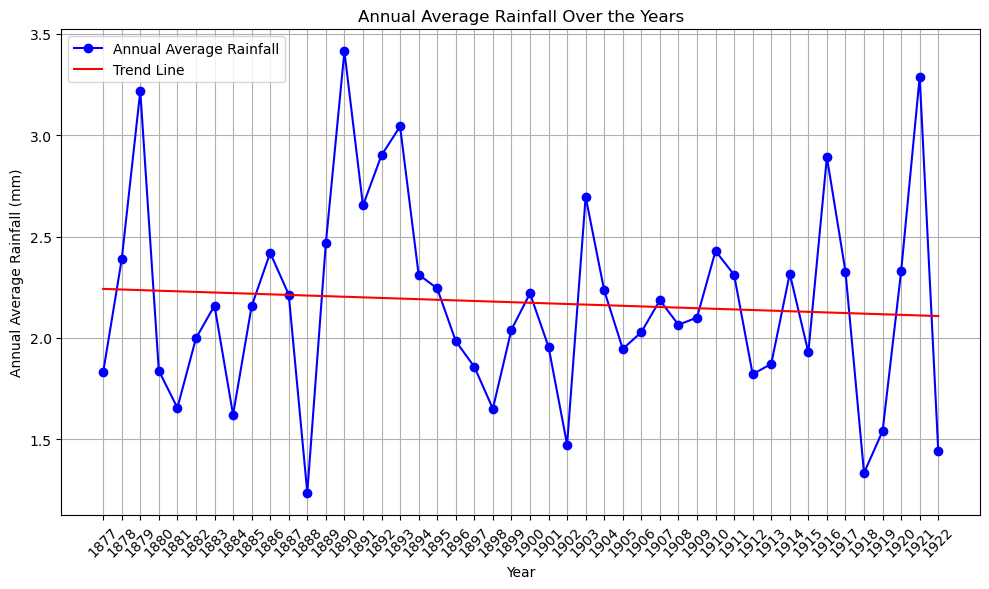

In [10]:

# Assuming you have the DataFrame 'df' containing rainfall data

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with '-99.9' rainfall values
df_filtered = df[df['Rainfall..mm.'] != -99.9]

# Calculate the annual average rainfall for each year
annual_avg_rainfall = df_filtered.groupby(df_filtered['Date'].dt.year)['Rainfall..mm.'].mean().reset_index()

# Rename columns for better clarity
annual_avg_rainfall.columns = ['Year', 'Annual Average Rainfall (mm)']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(annual_avg_rainfall['Year'], annual_avg_rainfall['Annual Average Rainfall (mm)'])

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_rainfall['Year'], annual_avg_rainfall['Annual Average Rainfall (mm)'], marker='o', color='b', label='Annual Average Rainfall')
plt.plot(annual_avg_rainfall['Year'], intercept + slope * annual_avg_rainfall['Year'], color='r', label='Trend Line')
plt.title('Annual Average Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Annual Average Rainfall (mm)')
plt.grid(True)
plt.xticks(annual_avg_rainfall['Year'], rotation=45)
plt.legend()

# Calculate the decrease in rainfall trend
decrease_per_year = -slope
print("Decrease in Rainfall Trend Per Year:", decrease_per_year, "mm")

#Total Decrease
total_decrease=decrease_per_year*45
print("Total Decrease in rainfall is:" , total_decrease)

plt.tight_layout()
plt.show()


In [11]:


# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with missing temperature data (-99.9)
df_filtered = df[df['Maximum.Temp..C.'] != -99.9]

# Calculate the monthly average maximum temperature
monthly_avg_max_temp = df_filtered.groupby([df_filtered['Year'], df_filtered['Month']])['Maximum.Temp..C.'].mean().reset_index()

# Set display option to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

monthly_avg_max_temp['Year'] = monthly_avg_max_temp['Year'].astype(int)
monthly_avg_max_temp['Month'] = monthly_avg_max_temp['Month'].astype(int)



 #Print the monthly average maximum temperature
print("Monthly Average Maximum Temperature:")
print(monthly_avg_max_temp.to_string(index=False))

# Save the monthly average maximum temperature DataFrame
monthly_avg_max_temp_df = monthly_avg_max_temp

Monthly Average Maximum Temperature:
 Year  Month  Maximum.Temp..C.
 1877     10             20.78
 1877     11             27.58
 1877     12             28.60
 1877      7             10.77
 1877      8             15.20
 1877      9             16.04
 1878      1             30.26
 1878     10             22.30
 1878     11             27.70
 1878     12             28.56
 1878      2             25.93
 1878      3             24.91
 1878      4             20.82
 1878      5             15.71
 1878      6              9.28
 1878      7             11.67
 1878      8             13.91
 1878      9             17.56
 1879      1             28.83
 1879     10             22.63
 1879     11             24.35
 1879     12             26.39
 1879      2             25.24
 1879      3             21.88
 1879      4             17.90
 1879      5             11.54
 1879      6              9.77
 1879      7              9.76
 1879      8             11.35
 1879      9             15.99
 1

In [ ]:
# Merge the DataFrames for monthly average maximum and minimum temperatures on 'Year' and 'Month'
monthly_avg_temp_combined = pd.merge(monthly_avg_max_temp, monthly_avg_min_temp, on=['Year', 'Month'], suffixes=('_max', '_min'))

# Calculate the average temperature by adding the monthly average maximum and minimum temperatures
monthly_avg_temp_combined['Monthly Avg Temperature (C)'] = (monthly_avg_temp_combined['Maximum.Temp..C.'] + monthly_avg_temp_combined['Minimum.Temp..C.']) / 2

# Print the DataFrame
print("Monthly Average Temperature (Combined):")
print(monthly_avg_temp_combined.to_string(index=False))





In [12]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with missing temperature data (-99.9)
df_filtered = df[df['Minimum.Temp..C.'] != -99.9]

# Calculate the monthly average minimum temperature
monthly_avg_min_temp = df_filtered.groupby([df_filtered['Year'], df_filtered['Month']])['Minimum.Temp..C.'].mean().reset_index()

# Set display option to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

monthly_avg_min_temp['Year'] = monthly_avg_min_temp['Year'].astype(int)
monthly_avg_min_temp['Month'] = monthly_avg_min_temp['Month'].astype(int)


# Print the monthly average minimum temperature
print("Monthly Average Minimum Temperature:")
print(monthly_avg_min_temp.to_string(index=False))

# Save the monthly average maximum temperature DataFrame
monthly_avg_min_temp_df = monthly_avg_min_temp

Monthly Average Minimum Temperature:
 Year  Month  Minimum.Temp..C.
 1877     10              5.11
 1877     11             10.88
 1877     12             12.31
 1877      7              2.09
 1877      8              0.04
 1877      9              2.87
 1878      1             13.22
 1878     10              8.46
 1878     11             10.57
 1878     12             12.85
 1878      2             14.01
 1878      3             13.39
 1878      4              7.38
 1878      5              3.79
 1878      6             -1.68
 1878      7              0.07
 1878      8              1.60
 1878      9              6.33
 1879      1             13.01
 1879     10              8.00
 1879     11              9.18
 1879     12             11.55
 1879      2             13.19
 1879      3             11.03
 1879      4              7.72
 1879      5              3.75
 1879      6             -0.57
 1879      7              1.03
 1879      8              3.18
 1879      9              5.93
 1

Trend for Month 1: stable
Slope value for Month 1: nan
Intercept value for Month 1: nan


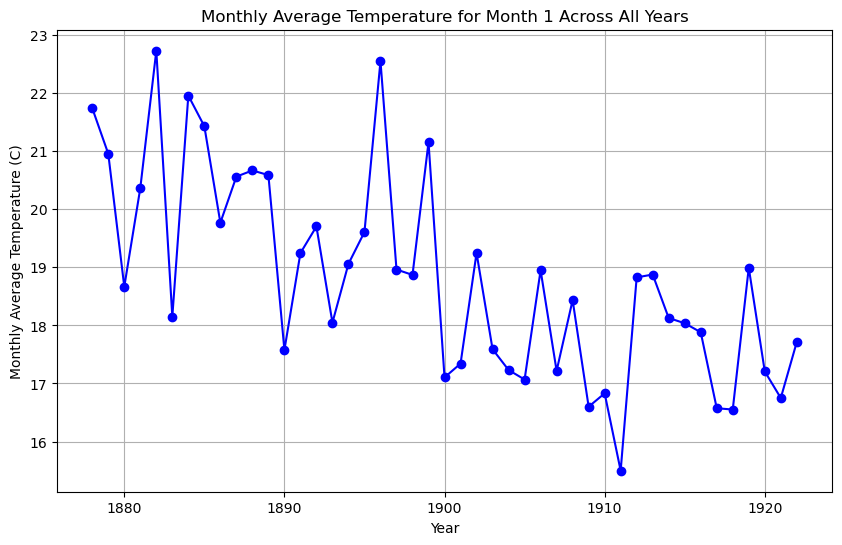

Trend for Month 2: decreasing
Slope value for Month 2: -0.07637313144959317
Intercept value for Month 2: 163.39540752900263


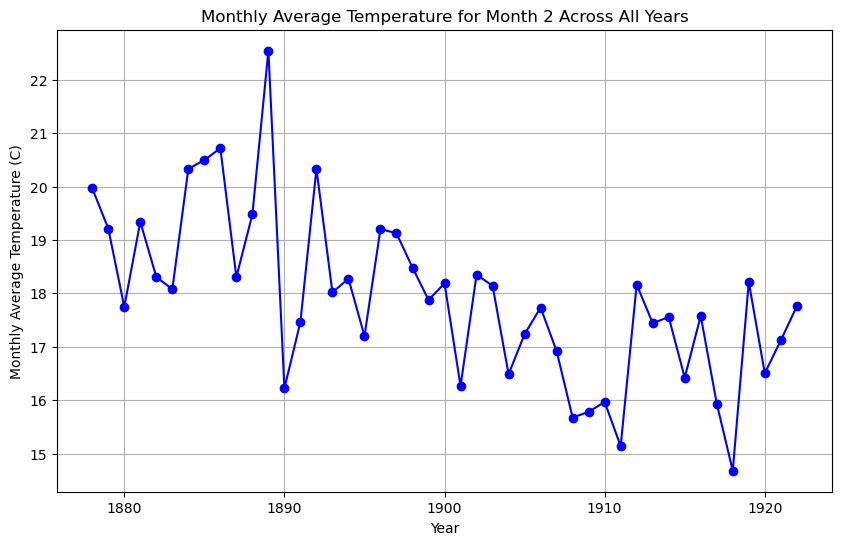

Trend for Month 3: decreasing
Slope value for Month 3: -0.060943460388022806
Intercept value for Month 3: 133.60181860870682


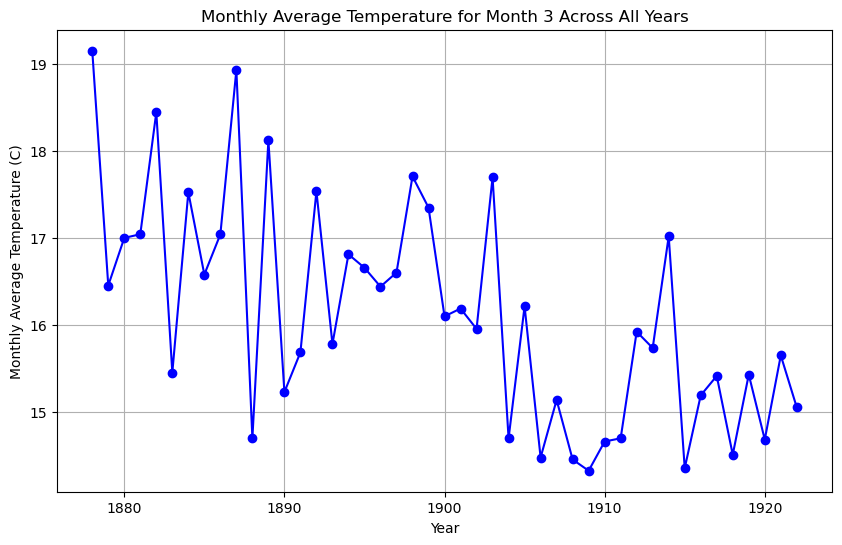

Trend for Month 4: decreasing
Slope value for Month 4: -0.0039848715299794155
Intercept value for Month 4: 21.58358873330134


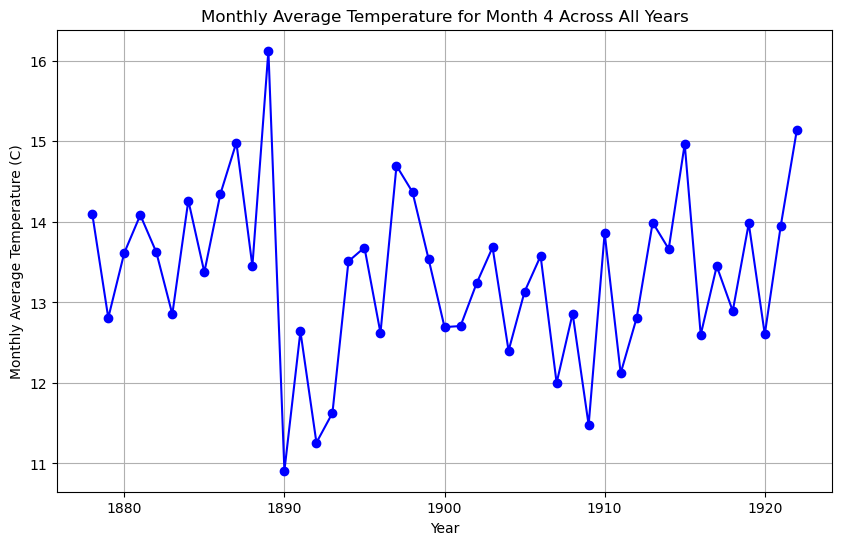

Trend for Month 5: increasing
Slope value for Month 5: 0.05963945421868437
Intercept value for Month 5: -102.24966921623763


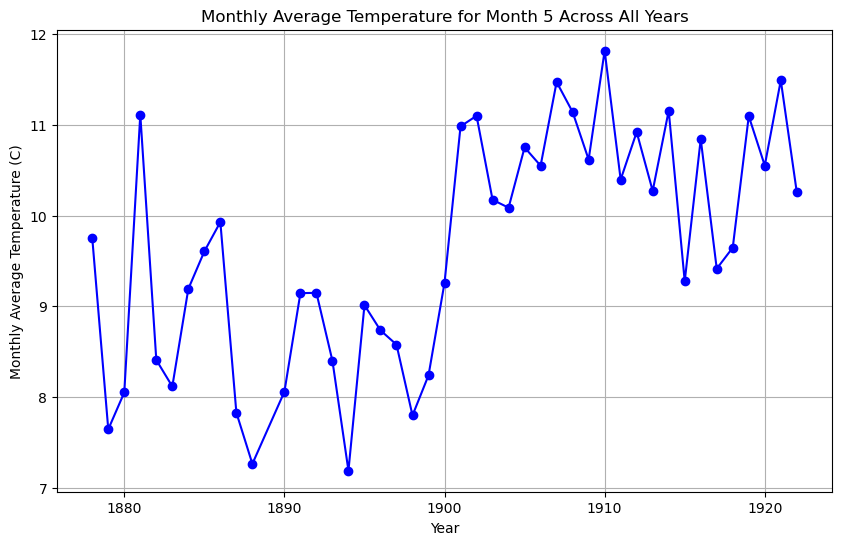

Trend for Month 6: increasing
Slope value for Month 6: 0.12660290579818312
Intercept value for Month 6: -233.96025708898787


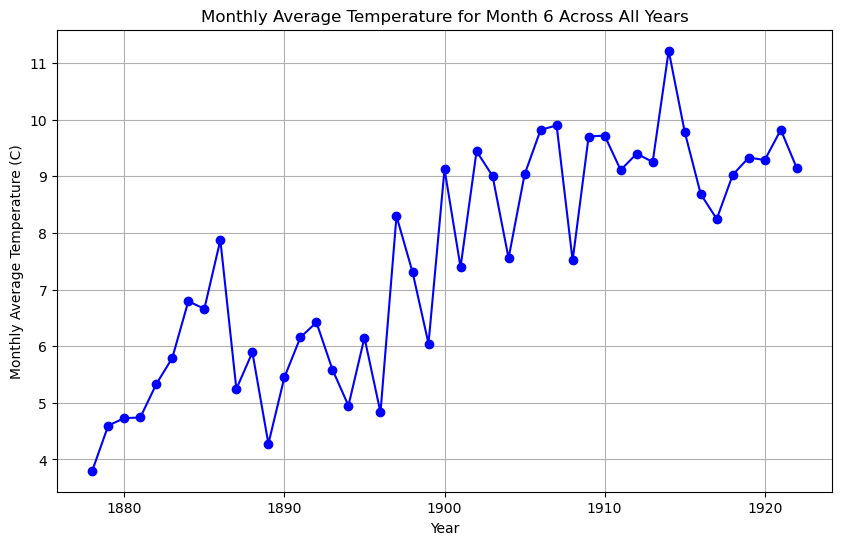

Trend for Month 7: increasing
Slope value for Month 7: 0.1475747391866959
Intercept value for Month 7: -270.56596727161


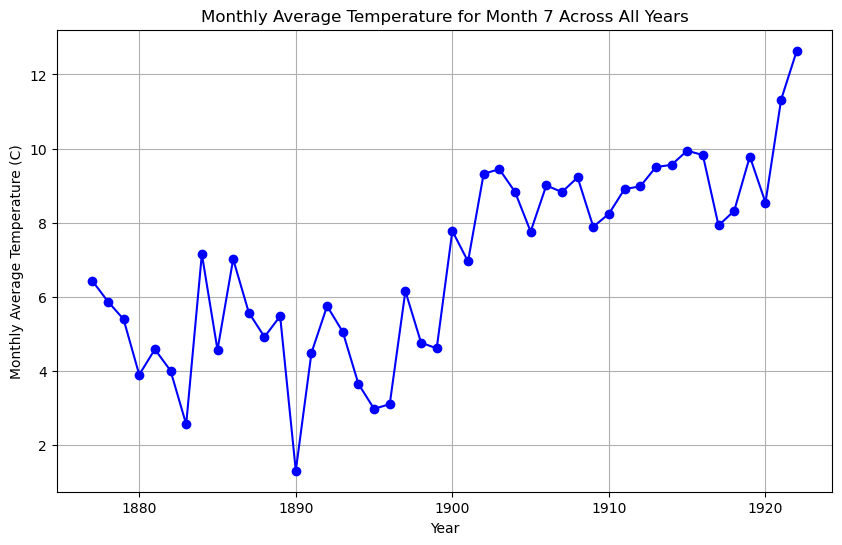

Trend for Month 8: increasing
Slope value for Month 8: 0.1036747936073378
Intercept value for Month 8: -186.9798456654892


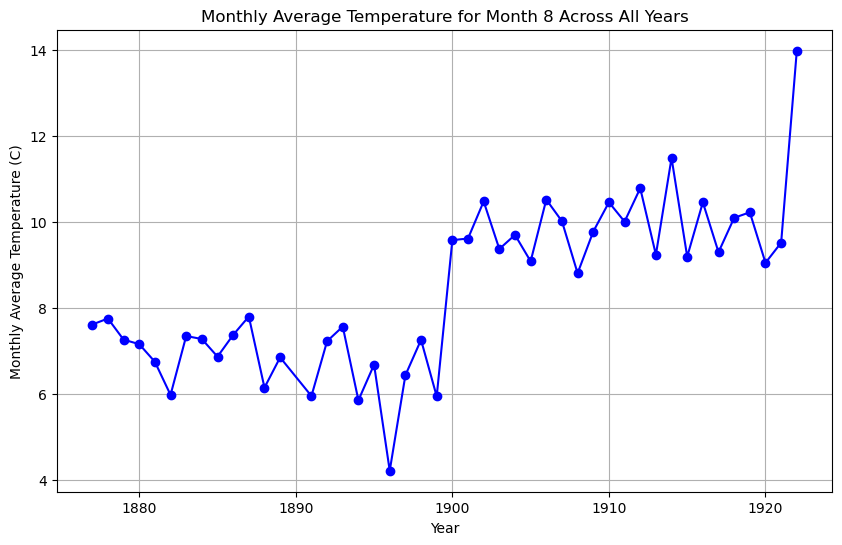

Trend for Month 9: increasing
Slope value for Month 9: 0.06955684284135548
Intercept value for Month 9: -121.10319401322424


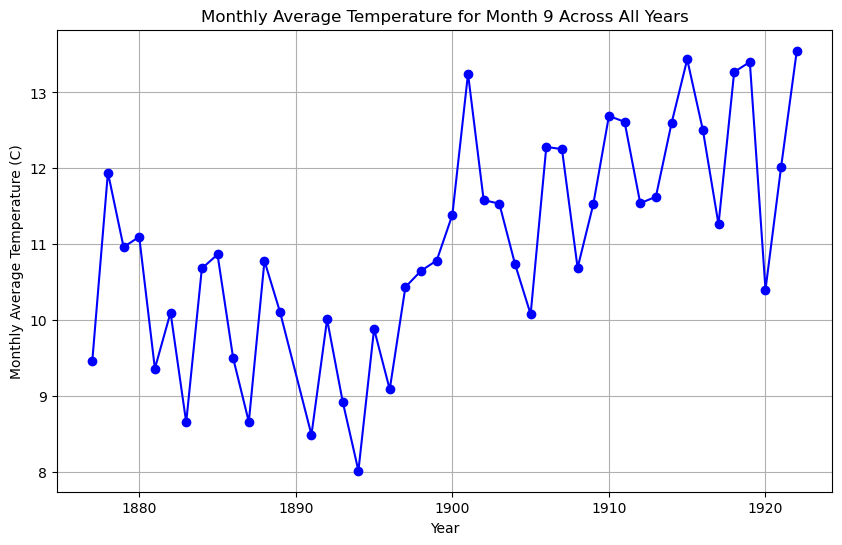

Trend for Month 10: increasing
Slope value for Month 10: 0.00907540671514564
Intercept value for Month 10: -4.08776421077998


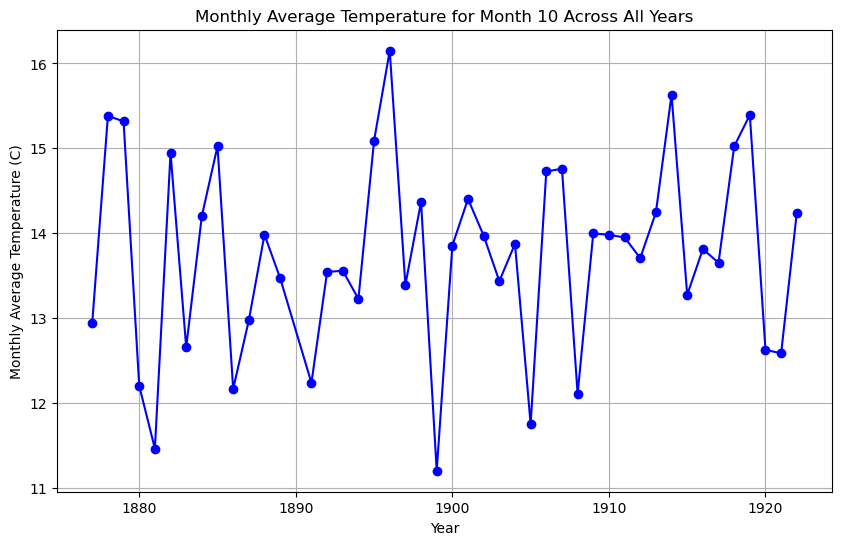

Trend for Month 11: decreasing
Slope value for Month 11: -0.030135221902726418
Intercept value for Month 11: 75.739673580383


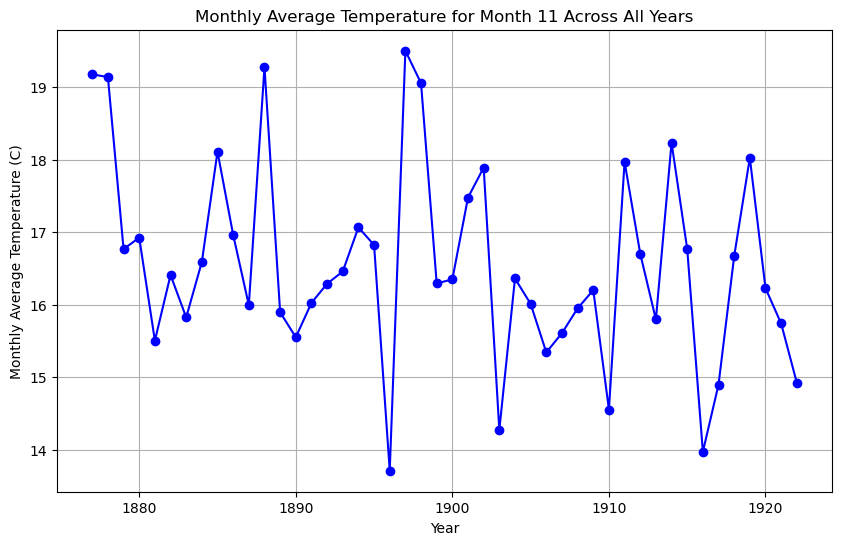

Trend for Month 12: decreasing
Slope value for Month 12: -0.06537191036145165
Intercept value for Month 12: 143.15630155489634


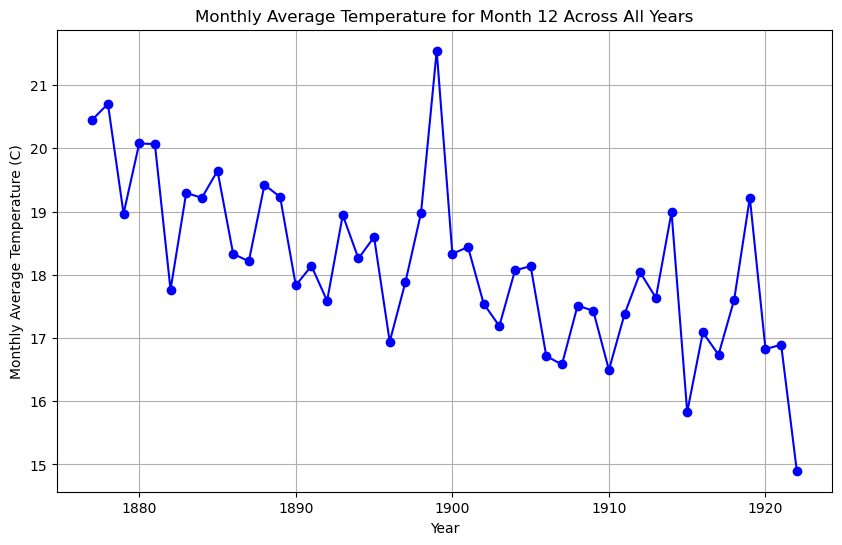

In [17]:


import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to calculate monthly average for a given month
def calculate_monthly_average(month):
    # Filter the data for the given month
    month_data = df[df['Date'].dt.month == month]
    
    # Filter out rows with '-99.9' temperature values
    month_data = month_data[(month_data['Maximum.Temp..C.'] != -99.9) & (month_data['Minimum.Temp..C.'] != -99.9)]
    
    # Calculate the monthly average temperature for all years
    monthly_avg_temp = month_data.groupby(month_data['Date'].dt.year)[['Maximum.Temp..C.', 'Minimum.Temp..C.']].mean().mean(axis=1)
    
    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-', color='b')  # Add linestyle='-'
    plt.title(f'Monthly Average Temperature for Month {month} Across All Years')
    plt.xlabel('Year')
    plt.ylabel('Monthly Average Temperature (C)')
    plt.grid(True)

    # Perform linear regression to determine trend
    slope, _, _, _, _ = linregress(monthly_avg_temp.index, monthly_avg_temp.values)
    
    # Calculate the intercept manually using one of the points on the regression line
    intercept = monthly_avg_temp.values[0] - slope * monthly_avg_temp.index[0]

    # Determine if the trend is increasing or decreasing
    if slope > 0:
        trend = 'increasing'
    elif slope < 0:
        trend = 'decreasing'
    else:
        trend = 'stable'

    # Print the trend, slope, and intercept values
    print(f"Trend for Month {month}: {trend}")
    print(f"Slope value for Month {month}: {slope}")
    print(f"Intercept value for Month {month}: {intercept}")

    plt.show()

# Loop through all months and calculate monthly averages
for month in range(1, 13):
    calculate_monthly_average(month)


In [13]:
 #Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# Filter out rows with missing temperature data (-99.9)
df_filtered = df[(df['Maximum.Temp..C.'] != -99.9) & (df['Minimum.Temp..C.'] != -99.9)]

# Calculate the annual average maximum temperature
annual_avg_max_temp = df_filtered.groupby(df_filtered['Year'])['Maximum.Temp..C.'].mean().reset_index()
annual_avg_max_temp.columns = ['Year', 'Annual Average Maximum Temp (C)']

# Calculate the annual average minimum temperature
annual_avg_min_temp = df_filtered.groupby(df_filtered['Year'])['Minimum.Temp..C.'].mean().reset_index()
annual_avg_min_temp.columns = ['Year', 'Annual Average Minimum Temp (C)']

# Print the annual average maximum and minimum temperature DataFrames
print("Annual Average Maximum Temperature:") 
print(annual_avg_max_temp)

print("\nAnnual Average Minimum Temperature:")
print(annual_avg_min_temp)




# Calculate the annual average temperature by adding the annual average maximum and minimum temperatures
annual_avg_temperature = annual_avg_max_temp.set_index('Year')['Annual Average Maximum Temp (C)'] + \
                         annual_avg_min_temp.set_index('Year')['Annual Average Minimum Temp (C)']

# Convert the resulting Series back to a DataFrame
annual_avg_temperature = annual_avg_temperature.reset_index()
annual_avg_temperature.columns = ['Year', 'Annual Average Temperature (C)']

print(annual_avg_temperature)

Annual Average Maximum Temperature:
      Year  Annual Average Maximum Temp (C)
0  1877.00                            20.21
1  1878.00                            20.67
2  1879.00                            18.54
3  1880.00                            19.44
4  1881.00                            19.90
5  1882.00                            19.41
6  1883.00                            18.57
7  1884.00                            21.28
8  1885.00                            21.03
9  1886.00                            20.09
10 1887.00                            19.24
11 1888.00                            21.58
12 1889.00                            21.15
13 1890.00                            19.75
14 1891.00                            18.58
15 1892.00                            19.60
16 1893.00                            18.71
17 1894.00                            18.77
18 1895.00                            20.13
19 1896.00                            19.13
20 1897.00                            21

Annual Maximum Temperature:
Increase per year: 0.01°C
Decrease per year: -0.01°C
Annual Minimum Temperature:
Increase per year: 0.03°C
Decrease per year: -0.03°C


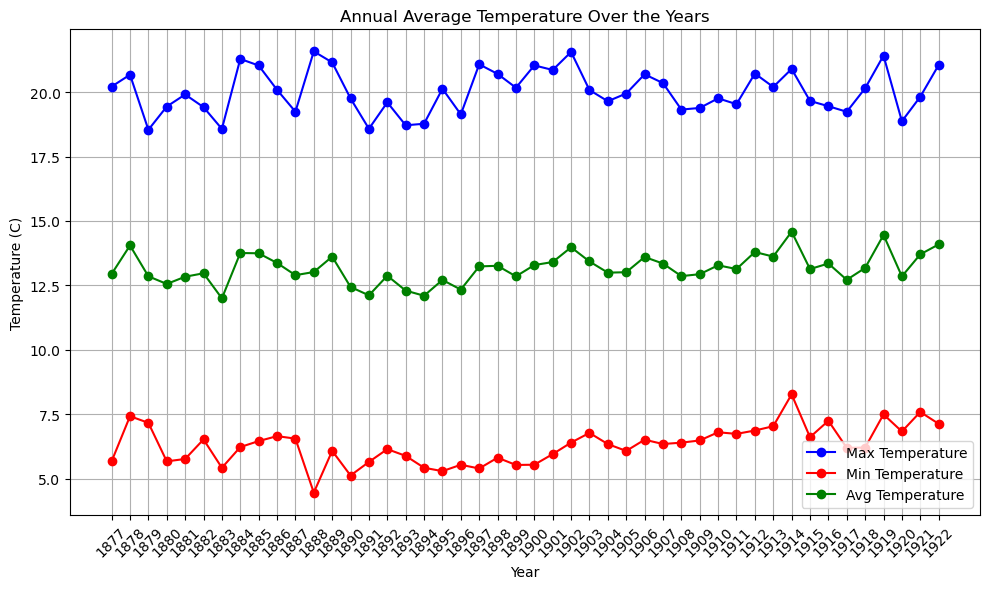

In [14]:
# Assuming you have the DataFrame 'df' containing temperature data

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with missing temperature data (-99.9)
df_filtered = df[(df['Maximum.Temp..C.'] != -99.9) & (df['Minimum.Temp..C.'] != -99.9)]

# Calculate the annual average maximum and minimum temperature
annual_avg_temp = df_filtered.groupby(df_filtered['Date'].dt.year)[['Maximum.Temp..C.', 'Minimum.Temp..C.']].mean().reset_index()

# Perform linear regression to determine trend
slope_max, intercept_max, _, _, _ = linregress(annual_avg_temp['Date'], annual_avg_temp['Maximum.Temp..C.'])
slope_min, intercept_min, _, _, _ = linregress(annual_avg_temp['Date'], annual_avg_temp['Minimum.Temp..C.'])

# Plot the line graph showing the trend of annual average maximum and minimum temperature
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_temp['Date'], annual_avg_temp['Maximum.Temp..C.'], marker='o', color='b', label='Max Temperature')
plt.plot(annual_avg_temp['Date'], annual_avg_temp['Minimum.Temp..C.'], marker='o', color='r', label='Min Temperature')
plt.title('Annual Average Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.xticks(annual_avg_temp['Date'], rotation=45)
plt.legend()

# Calculate the increase or decrease per year and total increase or decrease
increase_per_year_max = slope_max
decrease_per_year_max = -slope_max

increase_per_year_min = slope_min
decrease_per_year_min = -slope_min

# Print the increase or decrease per year and total increase or decrease
print("Annual Maximum Temperature:")
print(f"Increase per year: {increase_per_year_max:.2f}°C")
print(f"Decrease per year: {decrease_per_year_max:.2f}°C")

print("Annual Minimum Temperature:")
print(f"Increase per year: {increase_per_year_min:.2f}°C")
print(f"Decrease per year: {decrease_per_year_min:.2f}°C")


# Add annual average temperature to the plot
annual_avg_temp['Annual Avg Temp (C)'] = (annual_avg_temp['Maximum.Temp..C.'] + annual_avg_temp['Minimum.Temp..C.']) / 2
plt.plot(annual_avg_temp['Date'], annual_avg_temp['Annual Avg Temp (C)'], marker='o', color='g', label='Avg Temperature')

plt.tight_layout()
plt.legend()
plt.show()

In [15]:
# Filter out rows with valid rainfall data (excluding -99.99 values)
valid_rainfall = df[df['Rainfall..mm.'] > 50.00]

# Extract dates and rainfall recorded
dates_and_rainfall = valid_rainfall[['Date', 'Rainfall..mm.']]

# Display the list of dates and rainfall recorded
print("Dates and Rainfall Recorded when Rainfall Exceeded 50.00 mm (excluding -99.99 values):")
print(dates_and_rainfall)

# Calculate the total number of incidents
total_incidents = len(valid_rainfall)
print("\nTotal Number of Incidents (excluding -99.99 values):", total_incidents)

Dates and Rainfall Recorded when Rainfall Exceeded 50.00 mm (excluding -99.99 values):
            Date  Rainfall..mm.
406   1878-02-11          67.30
418   1878-02-23          75.40
762   1879-02-02          62.00
1366  1880-09-28          59.90
1695  1881-08-23          61.00
1863  1882-02-07          55.40
4760  1890-01-13          83.60
4833  1890-03-27          57.70
5065  1890-11-14          78.20
5126  1891-01-14          74.70
5794  1892-11-12          57.70
5912  1893-03-10         119.60
6005  1893-06-11          76.20
6214  1894-01-06          56.40
6501  1894-10-20          51.10
6592  1895-01-19          66.80
6881  1895-11-04         102.40
6964  1896-01-26          64.80
8063  1899-01-29          62.70
9481  1902-12-18          58.40
9647  1903-02-06          99.80
10640 1906-02-19          54.60
11429 1908-04-18          52.80
11569 1908-05-09          53.60
12065 1910-01-14          56.10
12822 1912-10-02          60.20
13826 1914-10-11          86.40
14590 1916-12-13 

In [16]:
# Filter out rows with valid maximum temperature exceeding 40°C
high_max_temp = df[(df['Maximum.Temp..C.'] > 38.0) & (df['Maximum.Temp..C.'] != -99.9)]

# Filter out rows with valid minimum temperature below 5°C
low_min_temp = df[(df['Minimum.Temp..C.'] < -7.0) & (df['Minimum.Temp..C.'] != -99.9)]

# Extract dates and temperatures recorded
dates_and_high_max_temp = high_max_temp[['Date', 'Maximum.Temp..C.']]
dates_and_low_min_temp = low_min_temp[['Date', 'Minimum.Temp..C.']]

# Display the list of dates and temperatures recorded
print("Dates and Maximum Temperatures Recorded when Maximum Temperature Exceeded 38°C (excluding -99.9 values):")
print(dates_and_high_max_temp)
print("\nDates and Minimum Temperatures Recorded when Minimum Temperature Fell Below -7°C (excluding -99.9 values):")
print(dates_and_low_min_temp)

# Calculate the total number of incidents
total_high_max_temp_incidents = len(high_max_temp)
total_low_min_temp_incidents = len(low_min_temp)

print("\nTotal Number of Incidents (Maximum Temperature Exceeded 38°C):", total_high_max_temp_incidents)
print("Total Number of Incidents (Minimum Temperature Fell Below -7C):", total_low_min_temp_incidents)

Dates and Maximum Temperatures Recorded when Maximum Temperature Exceeded 38°C (excluding -99.9 values):
            Date  Maximum.Temp..C.
2562  1884-01-07             38.40
2572  1884-01-17             39.20
4396  1889-01-14             38.50
4397  1889-01-15             38.10
4398  1889-01-16             39.40
8371  1899-12-03             38.40
9498  1903-04-01             38.20
10226 1905-01-01             38.30
10227 1905-02-01             38.10
10228 1905-03-01             38.30
11689 1909-03-01             40.40

Dates and Minimum Temperatures Recorded when Minimum Temperature Fell Below -7°C (excluding -99.9 values):
            Date  Minimum.Temp..C.
1320  1880-08-13             -7.20
4164  1888-05-27             -7.50
4166  1888-05-29             -7.10
4192  1888-06-24             -7.80
4195  1888-06-27             -7.30
4196  1888-06-28             -8.00
4214  1888-07-16             -7.50
4224  1888-07-26            -10.90
4225  1888-07-27             -7.40
4231  1888-08-02 